In [ ]:
# version de ubuntu instalada
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
# @title Correr esta celda para poder usar selenium en google colab (Mayo 2023)
# https://github.com/googlecolab/colabtools/issues/3347#issuecomment-1387453484

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.Rivkq0252P/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.U1hMEr1cAV/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.AkHb6EIO1q/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Hit:2 http://archive.ubuntu.com/ubuntu 

In [ ]:
from selenium import webdriver

from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

import time

In [ ]:
options = Options()
options.add_argument('--headless') # sin interfaz grafica
options.add_argument('--no-sandbox') # Seguridad
options.add_argument('--disable-dev-shm-usage') # configuracion de linux
options.add_argument('--disable-gpu')
options.add_argument('--user-agent=""Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36""') # user agent


# 1) Clickeando un boton que descarga un archivo -  Dificultad 2/10

En la pagina: 

http://www.mediafire.com/file/v2qv47cervr9ii7/bm1023.zip/file

Clickear el boton de descarga y verificar que el archivo es descargado.

In [ ]:
driver_0 = webdriver.Chrome(service=Service(), options=options)
wait = WebDriverWait(driver_0, 20)

driver_0.get("http://www.mediafire.com/file/v2qv47cervr9ii7/bm1023.zip/file")
boton_descarga = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#downloadButton")))
boton_descarga.click()

driver_0.save_screenshot("state.png")

driver_0.close()

#2) Consiguiendo Links -  Dificultad 5/10

En la pagina:

https://infolibros.org/libros-pdf-gratis/informatica/programacion/

Recopilar todos los links de lectura de los libros, armar los links de descarga y hacer la prueba descargando un libro.

In [ ]:
driver_1 = webdriver.Chrome(service=Service(), options=options)

driver_1.get("https://infolibros.org/libros-pdf-gratis/informatica/programacion/")

driver_1.save_screenshot("state.png")

links_lectura = [element.get_attribute("href") for element in driver_1.find_elements(by=By.XPATH, value='//a[@class="Libros_Boton_Dos"]')]
links_descarga = [f"https://drive.google.com/u/0/uc?id={link.split('/')[-2]}&export=download" for link in links_lectura]
driver_1.get(links_descarga[8])  # solo descargando 1

driver_1.close()

# 3) Iniciando sesion en Kaggle (credenciales o cookies) -  Dificultad 7/10
Entre a la pagina:

https://www.kaggle.com/datasets?topic=trendingDataset

Debera iniciar sesion usando 2 metodos:
- Usando las credenciales (mail y contraseña)
- Usando las cookies generadas luego de iniciar sesion en la pagina manualmente, para conseguir las cookies deberia entrar en el Network de las Herramientas de Desarrollador, y buscar alguna request que tenga el header de cookie, darle click derecho y copiar el valor.

Luego de haber iniciado sesion exitosamente debera recopilar todos los links de los datasets para proceder a usar esos links y descargar los datasets (hacer la prueba con 1 link)



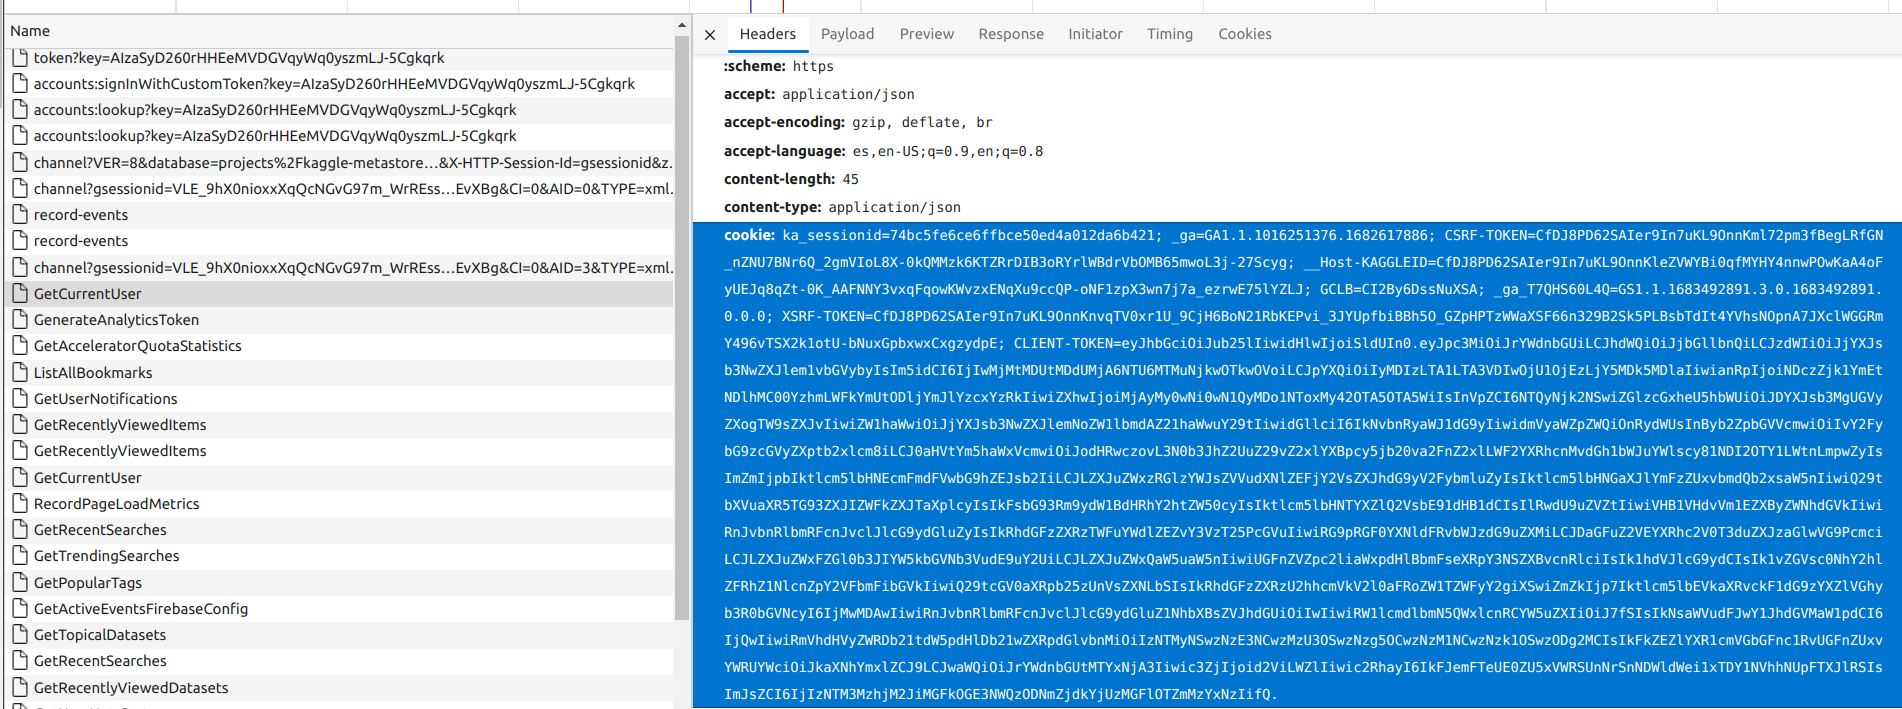

### Notas (para la parte de usar cookies):
- debera procesar las cookies primero para crear un diccionario y poder usar:

    ```python
    for name, value in cookies.items():
        driver.add_cookie({"name": name, "value": value})
        
    driver.refresh()

    ```


## Usando credenciales (usar la opcion de iniciar sesion con Mail)

In [ ]:
# @title PASSWORD
PASSWORD = "kagglepythoncolab13"

In [ ]:
driver_2 = webdriver.Chrome(service=Service(), options=options)
wait = WebDriverWait(driver_2, 20)

driver_2.get("https://www.kaggle.com/datasets?topic=trendingDataset")
time.sleep(1)
driver_2.save_screenshot("state_kaggle_0.png")
boton_signin = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[text()='Sign In']")))
boton_signin.click()
time.sleep(1)
driver_2.save_screenshot("state_kaggle_1.png")
boton_signin_mail = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[text()='Sign in with your email']")))
boton_signin_mail.click()
time.sleep(1)
driver_2.save_screenshot("state_kaggle_2.png")
driver_2.find_element(By.XPATH, "//input[@name='email']").send_keys("perez.moleroc@gmail.com" + Keys.TAB + PASSWORD + Keys.ENTER)
time.sleep(1)
driver_2.save_screenshot("state_kaggle_3.png")

driver_2.close()




In [ ]:
dir(boton_signin)

## Usando cookies


In [ ]:
cookies = {pair.split("=")[0].strip(): pair.split("=")[1].strip() for pair in input("Pegue su cookie de kaggle").split(";")}

driver_3 = webdriver.Chrome(service=Service(), options=options)
driver_3.get("https://www.kaggle.com/datasets?topic=trendingDataset")
time.sleep(1)
driver_3.save_screenshot("state_kaggle_4.png")

for name, value in cookies.items():
    driver_3.add_cookie({"name": name, "value": value})

driver_3.refresh()

time.sleep(2)
driver_3.save_screenshot("state_kaggle_5.png")

links_descarga = [element.get_attribute("href") for element in driver_3.find_elements(by=By.XPATH, value="//h2[text()='Trending Datasets']/parent::div/following-sibling::ul/li/div/a")]


driver_3.get(links_descarga[0])
time.sleep(2)

driver_3.save_screenshot("state_kaggle_6.png")

driver_3.find_element(by=By.XPATH, value="//button/span[contains(text(), 'Download')]").click()

driver_3.close()

In [ ]:
len(links_descarga)

24

# 4) Tomando screenshots  -  Dificultad 8/10
Pagina: 

[https://www.omip.pt/en/dados-mercado?date=2023-05-07&product=EL&zone=ES&instrument=FTB](https://www.omip.pt/en/dados-mercado?date=2023-05-07&product=EL&zone=ES&instrument=FTB)

Ir a la seccion **SPEL Base Futures - Year** y en la fila correspondiente al Contract name **FTB YR-29** abrir el grafico al presionar el boton con el simbolo:




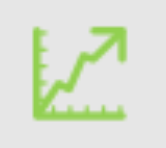

Luego tomar y guardar un screenshot de manera automatizada donde se visualice el primer grafico, luego presionar el boton the **FULL HISTORIC DATA** y tomar y guardar un screenshot del segundo grafico que aparece.


### Notas importantes:
- la clave de este ejercicio es saber manipular el driver para poder tener en pantalla lo que se necesita (sobre todo lo que se necesita clickear). Para esto toma en cuenta que puedes usar:
    ```python
    driver.execute_script("arguments[0].scrollIntoView();", elemento_a_enfocar)
    ```

    para hacer scroll hasta donde esta el elemento de interes.

- si llegas a tener errores porque el click que tratas de hacer se sale de la ventana deberas cambiar el tamaño de la ventana a algun tamaño que te sirva hasta que ya el error no suceda:
```python
driver.set_window_size(1890, 1000)
```


In [ ]:
driver_18 = webdriver.Chrome(service=Service(), options=options)
wait = WebDriverWait(driver_18, 20)
driver_18.get("https://www.omip.pt/en/dados-mercado?date=2023-05-07&product=EL&zone=ES&instrument=FTB")
driver_18.set_window_size(1796, 950) # esto evita errores cuando quiera clickear los botones
driver_18.save_screenshot("status_1.png")

year_29_row = driver_18.find_element(By.XPATH, '//a[@rel="FTBYR-29"]')
driver_18.execute_script("arguments[0].scrollIntoView();", year_29_row)
time.sleep(1)
driver_18.save_screenshot("status_2.png")

graph_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//a[@rel="FTBYR-29"]')))
time.sleep(1)
graph_button.click()
time.sleep(4)
driver_18.save_screenshot("first_graph.png")

full_history_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//tr[@rel="FTBYR-29"]/td/span/a')))
full_history_button.click()
time.sleep(4)
driver_18.save_screenshot("full_history_graph.png")


driver_18.close()